In [1]:
import sys
sys.path.append("../kaggle_varie")
%load_ext autoreload
%aimport varie
%autoreload 2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\ProgramData\Anacon

In [2]:
#from sklearn import *
import pandas as pd
import numpy as np
#total lines= 125497041

df_train = pd.read_csv(
 #   './input/train_2016.csv', 
    './input/train_2017.csv', 
#     './input/train.csv', 
    #usecols=[1, 2, 3, 4, 5], 
    names=['id','date','store_nbr','item_nbr','unit_sales','onpromotion'],
    dtype={
        'onpromotion': np.bool,
        "store_nbr": "category",
        "item_nbr": "category",
        },
    converters={'unit_sales': lambda u: float(u) if float(u) > 0 else 0},
    #skiprows=range(1, 124035460),    
   # skiprows=range(1, 125497000), 
    parse_dates=["date"]  # , date_parser=parser
    #skiprows=range(1, 66458909)
)

print("ok reading")

#df_train['date'] = pd.to_datetime(df_train.date, format='%Y-%m-%d')
#df_train['date']=df_train['date'].dt.date
df_train["unit_sales"] = df_train["unit_sales"].apply(np.log1p)
df_train["unit_sales"]=df_train["unit_sales"].astype("float32")
df_train['dow'] = df_train['date'].dt.dayofweek
print(len(df_train))
#initial_date='2016-8-16'
#final_date='2016-8-31'
initial_date='2017-7-1'
final_date='2017-12-31'
df_train=df_train[(df_train["date"]>=initial_date)&(df_train["date"]<=final_date)]
print(len(df_train))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ok reading
23891287
4854129


### test

In [3]:
df_test = pd.read_csv(
    "./input/test.csv", usecols=[0, 1, 2, 3, 4],
    dtype={
        'onpromotion': np.bool,
        "store_nbr": "category",
        "item_nbr": "category",
        },
    parse_dates=["date"]  # , date_parser=parser
)
#.set_index(
#    ['store_nbr', 'item_nbr', 'date']
#)



In [4]:
print(len(df_test))
df_test.head()


3370464


,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [5]:
dates_test=df_test.date.unique()
stores_test=df_test.store_nbr.unique()
items_test=df_test.item_nbr.unique()
print(dates_test.min(),dates_test.max(),len(dates_test))
print(len(stores_test),len(items_test))
print(len(dates_test)*len(stores_test)*len(items_test),len(df_test))

2017-08-16T00:00:00.000000000 2017-08-31T00:00:00.000000000 16
54 3901
3370464 3370464


In [6]:
df_test.dtypes

id                      int64
date           datetime64[ns]
store_nbr            category
item_nbr             category
onpromotion              bool
dtype: object

### items

In [7]:
items = pd.read_csv(
    "./input/items.csv",    
    dtype={
        'perishable': np.bool,
        "family": "category",
        "class": "category",
        "item_nbr": "category",

        },
).set_index("item_nbr")

print(len(items))
items.head()
#items.perishable.value_counts()

4100


,family,class,perishable
item_nbr,,,
96995,GROCERY I,1093,False
99197,GROCERY I,1067,False
103501,CLEANING,3008,False
103520,GROCERY I,1028,False
103665,BREAD/BAKERY,2712,True


In [8]:
items.describe(include="all")

,family,class,perishable
count,4100,4100,4100
unique,33,337,2
top,GROCERY I,1016,False
freq,1334,133,3114


In [9]:
items.dtypes

family        category
class         category
perishable        bool
dtype: object

### stores

In [10]:
stores = pd.read_csv(
    "./input/stores.csv",    
    dtype={
        "store_nbr": "category",
        "city": "category",
        "state": "category",
        "type": "category",
        "cluster": "category",
        },
).set_index("store_nbr")

print(len(stores))
stores.head()
#items.perishable.value_counts()

54


,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [11]:
len(stores.city.unique()),len(stores.state.unique()),len(stores.type.unique()),len(stores.cluster.unique())

(22, 16, 5, 17)

In [12]:
stores.dtypes

city       category
state      category
type       category
cluster    category
dtype: object

### oil

In [13]:
 oil = pd.read_csv(
    "./input/oil.csv", 
     parse_dates=["date"]   
).set_index("date")

In [14]:
print(len(oil))
oil.head()

1218


,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [15]:
oil.tail()

,dcoilwtico
date,
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46
2017-08-30,45.96
2017-08-31,47.26


In [16]:
oil=oil.ffill().bfill()

In [17]:
oil.head()

,dcoilwtico
date,
2013-01-01,93.14
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


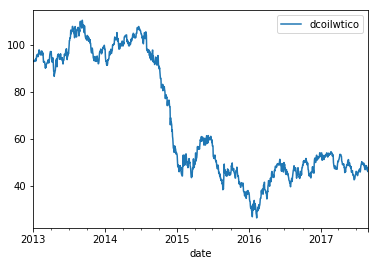

In [18]:
%matplotlib inline
oil.plot()

### transactions

In [19]:
transactions = pd.read_csv(
    "./input/transactions.csv",
    dtype={
        "store_nbr": "category",
        },
    parse_dates=["date"]  # , date_parser=parser
)

In [20]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### holidays

In [21]:
holidays = pd.read_csv(
    "./input/holidays_events.csv",
    dtype={
        "type": "category",
        "locale": "category",
        "locale_name": "category",
        "description": "category",
        "transferred":np.bool,
        },
    parse_dates=["date"]  # , date_parser=parser
)

In [22]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [23]:
holidays.locale_name.unique()

[Manta, Cotopaxi, Cuenca, Libertad, Riobamba, ..., Santa Elena, Quito, Loja, Salinas, Guayaquil]
Length: 24
Categories (24, object): [Manta, Cotopaxi, Cuenca, Libertad, ..., Quito, Loja, Salinas, Guayaquil]

In [24]:
holidays.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


### train

In [25]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,dow
19037158,120642911,2017-07-01,1,99197,1.098612,False,5
19037159,120642912,2017-07-01,1,103520,1.098612,False,5
19037160,120642913,2017-07-01,1,103665,2.484907,False,5
19037161,120642914,2017-07-01,1,105574,1.098612,False,5
19037162,120642915,2017-07-01,1,105575,1.386294,False,5


In [26]:
import sys
sys.getsizeof(df_train)/1024/1024

331.25611686706543

In [27]:
print(len(df_train.item_nbr.unique()),len(items))
print(len(df_train.store_nbr.unique()),len(stores))

3889 4100
54 54


In [28]:
df_train.dtypes

id                      int64
date           datetime64[ns]
store_nbr            category
item_nbr             category
unit_sales            float32
onpromotion            object
dow                     int64
dtype: object

In [29]:
df_train.onpromotion.value_counts()

False    4284723
True      569406
Name: onpromotion, dtype: int64

In [30]:
df_train.describe(include="all")

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,dow
count,4.854129e+06,4854129,4854129,4854129,4.854129e+06,4854129,4.854129e+06
unique,NaN,46,54,3889,NaN,2,NaN
top,NaN,2017-07-01 00:00:00,44,2042947,NaN,False,NaN
freq,NaN,118194,128578,2479,NaN,4284723,NaN
first,NaN,2017-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,1.230700e+08,NaN,NaN,NaN,1.678138e+00,NaN,3.050419e+00
std,1.401266e+06,NaN,NaN,NaN,8.679605e-01,NaN,2.074317e+00
min,1.206429e+08,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00
25%,1.218564e+08,NaN,NaN,NaN,1.098612e+00,NaN,1.000000e+00


### merging

In [31]:
#print(oil.index[0],df_train.date[0])

In [32]:
df_train.dtypes,df_test.dtypes

(id                      int64
 date           datetime64[ns]
 store_nbr            category
 item_nbr             category
 unit_sales            float32
 onpromotion            object
 dow                     int64
 dtype: object, id                      int64
 date           datetime64[ns]
 store_nbr            category
 item_nbr             category
 onpromotion              bool
 dtype: object)

In [33]:
df_train_test=df_train.append(df_test)
len(df_train_test),sys.getsizeof(df_train_test)/1024/1024

(8224593, 1043.2271518707275)

In [34]:
df_train_test["item_nbr"]=df_train_test["item_nbr"].astype("category")
df_train_test.dtypes

date           datetime64[ns]
dow                   float64
id                      int64
item_nbr             category
onpromotion            object
store_nbr            category
unit_sales            float32
dtype: object

In [35]:
sys.getsizeof(df_train_test)/1024/1024

560.22580909729

In [36]:
oil2=oil.loc[df_train_test.date.unique()].ffill().bfill()
#transactions2=transactions.loc[df_train_test.date.unique(),"date"]

In [37]:
final_df=df_train_test.\
            merge(items,left_on="item_nbr",right_index=True).\
            merge(stores,left_on="store_nbr",right_index=True).\
            merge(oil2,left_on="date",right_index=True)#.\
            #merge(transactions,on=["date","store_nbr"],how="left")
len(final_df)

8224593

In [38]:
final_df.head()

,date,dow,id,item_nbr,onpromotion,store_nbr,unit_sales,family,class,perishable,city,state,type,cluster,dcoilwtico
19037158,2017-07-01,5.0,120642911,99197,False,1,1.098612,GROCERY I,1067,False,Quito,Pichincha,D,13,46.02
19037159,2017-07-01,5.0,120642912,103520,False,1,1.098612,GROCERY I,1028,False,Quito,Pichincha,D,13,46.02
19037160,2017-07-01,5.0,120642913,103665,False,1,2.484907,BREAD/BAKERY,2712,True,Quito,Pichincha,D,13,46.02
19037161,2017-07-01,5.0,120642914,105574,False,1,1.098612,GROCERY I,1045,False,Quito,Pichincha,D,13,46.02
19037162,2017-07-01,5.0,120642915,105575,False,1,1.386294,GROCERY I,1045,False,Quito,Pichincha,D,13,46.02


In [39]:
for c in ['item_nbr','store_nbr','family','class','city','state','type','cluster']:
    final_df[c]=final_df[c].astype("category")
for c in ['unit_sales','dcoilwtico']:
    final_df[c]=final_df[c].astype("float32")
final_df.dtypes

date           datetime64[ns]
dow                   float64
id                      int64
item_nbr             category
onpromotion            object
store_nbr            category
unit_sales            float32
family               category
class                category
perishable               bool
city                 category
state                category
type                 category
cluster              category
dcoilwtico            float32
dtype: object

In [40]:
sys.getsizeof(final_df)/1024/1024

654.3871450424194

In [41]:
for c in final_df.columns:
    if (final_df[c].isnull().any()): print(c)

dow
unit_sales


In [42]:
#final_df_train=final_df[~(final_df.unit_sales.isnull())]
#final_df_test=final_df[final_df.unit_sales.isnull()]
#len(final_df),len(final_df_train),len(final_df_test),len(final_df_train)+len(final_df_test)

In [43]:
#final_df_train.groupby(["family",'class','perishable','store_nbr','city'])["unit_sales"].mean().reset_index()

In [44]:
final_df.head()


,date,dow,id,item_nbr,onpromotion,store_nbr,unit_sales,family,class,perishable,city,state,type,cluster,dcoilwtico
19037158,2017-07-01,5.0,120642911,99197,False,1,1.098612,GROCERY I,1067,False,Quito,Pichincha,D,13,46.02
19037159,2017-07-01,5.0,120642912,103520,False,1,1.098612,GROCERY I,1028,False,Quito,Pichincha,D,13,46.02
19037160,2017-07-01,5.0,120642913,103665,False,1,2.484907,BREAD/BAKERY,2712,True,Quito,Pichincha,D,13,46.02
19037161,2017-07-01,5.0,120642914,105574,False,1,1.098612,GROCERY I,1045,False,Quito,Pichincha,D,13,46.02
19037162,2017-07-01,5.0,120642915,105575,False,1,1.386294,GROCERY I,1045,False,Quito,Pichincha,D,13,46.02


In [45]:

#pd.get_dummies(final_df[cols_to_enc])

In [46]:
cols_to_enc=["family","class","city","state","type","cluster","store_nbr"]
for c in cols_to_enc:
    final_df[c]= final_df[c].cat.codes


In [47]:
final_df.head()

,date,dow,id,item_nbr,onpromotion,store_nbr,unit_sales,family,class,perishable,city,state,type,cluster,dcoilwtico
19037158,2017-07-01,5.0,120642911,99197,False,0,1.098612,12,44,False,18,12,3,4,46.02
19037159,2017-07-01,5.0,120642912,103520,False,0,1.098612,12,17,False,18,12,3,4,46.02
19037160,2017-07-01,5.0,120642913,103665,False,0,2.484907,5,187,True,18,12,3,4,46.02
19037161,2017-07-01,5.0,120642914,105574,False,0,1.098612,12,31,False,18,12,3,4,46.02
19037162,2017-07-01,5.0,120642915,105575,False,0,1.386294,12,31,False,18,12,3,4,46.02


In [48]:
#enc=varie.bin_enc(final_df,cols_to_enc)
enc=final_df

In [49]:
df_train.date.min(),df_train.date.max(),df_test.date.min(),df_test.date.max()

(Timestamp('2017-07-01 00:00:00'),
 Timestamp('2017-08-15 00:00:00'),
 Timestamp('2017-08-16 00:00:00'),
 Timestamp('2017-08-31 00:00:00'))

In [50]:
del(final_df)
del(df_train)
del(df_test)

In [51]:
enc.head()

,date,dow,id,item_nbr,onpromotion,store_nbr,unit_sales,family,class,perishable,city,state,type,cluster,dcoilwtico
19037158,2017-07-01,5.0,120642911,99197,False,0,1.098612,12,44,False,18,12,3,4,46.02
19037159,2017-07-01,5.0,120642912,103520,False,0,1.098612,12,17,False,18,12,3,4,46.02
19037160,2017-07-01,5.0,120642913,103665,False,0,2.484907,5,187,True,18,12,3,4,46.02
19037161,2017-07-01,5.0,120642914,105574,False,0,1.098612,12,31,False,18,12,3,4,46.02
19037162,2017-07-01,5.0,120642915,105575,False,0,1.386294,12,31,False,18,12,3,4,46.02


In [52]:
enc.tail().T

,20753542,20754039,20754514,20754202,20754299
date,2017-07-16 00:00:00,2017-07-16 00:00:00,2017-07-16 00:00:00,2017-07-16 00:00:00,2017-07-16 00:00:00
dow,6,6,6,6,6
id,122359295,122359792,122360267,122359955,122360052
item_nbr,413557,1162761,1935601,1368479,1457335
onpromotion,False,False,False,False,True
store_nbr,49,49,49,49,49
unit_sales,1.79176,2.70805,3.61092,0.693147,1.38629
family,12,7,12,15,18
class,38,230,2,299,242
perishable,False,False,False,False,False


../kaggle_varie\varie.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train=df[df[target].notnull()][df[date]<cut_date]        #train
../kaggle_varie\varie.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_eval= df[df[target].notnull()][df[date]>= cut_date]      #test (I have data to check)


(4332672, 521457, 3370464)

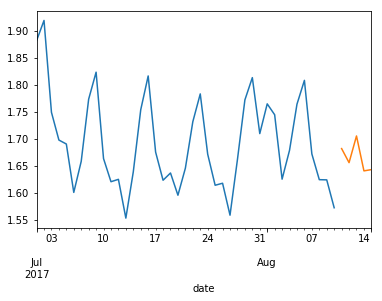

In [53]:
%matplotlib inline
import varie
#cut_date='2016-8-25'
cut_date='2017-8-11'
dff_train,dff_eval,dff_test=varie.train_eval_test(enc,cut_date=cut_date,target="unit_sales",date="date")
dff_train.groupby("date")["unit_sales"].mean().plot()
dff_eval.groupby("date")["unit_sales"].mean().plot()
len(dff_train), len(dff_eval), len(dff_test)

In [54]:
dff_train.columns

Index(['date', 'dow', 'id', 'item_nbr', 'onpromotion', 'store_nbr',
       'unit_sales', 'family', 'class', 'perishable', 'city', 'state', 'type',
       'cluster', 'dcoilwtico'],
      dtype='object')

In [55]:
dff_train.isnull().any()

date           False
dow            False
id             False
item_nbr       False
onpromotion    False
store_nbr      False
unit_sales     False
family         False
class          False
perishable     False
city           False
state          False
type           False
cluster        False
dcoilwtico     False
dtype: bool

In [56]:
items

,family,class,perishable
item_nbr,,,
96995,GROCERY I,1093,False
99197,GROCERY I,1067,False
103501,CLEANING,3008,False
103520,GROCERY I,1028,False
103665,BREAD/BAKERY,2712,True
105574,GROCERY I,1045,False
105575,GROCERY I,1045,False
105576,GROCERY I,1045,False
105577,GROCERY I,1045,False


In [57]:
dff_eval.head()

,date,dow,id,item_nbr,onpromotion,store_nbr,unit_sales,family,class,perishable,city,state,type,cluster,dcoilwtico
23369830,2017-08-11,4.0,124975583,103520,False,0,0.693147,12,17,False,18,12,3,4,48.810001
23369831,2017-08-11,4.0,124975584,103665,False,0,1.098612,5,187,True,18,12,3,4,48.810001
23369832,2017-08-11,4.0,124975585,105574,False,0,1.791759,12,31,False,18,12,3,4,48.810001
23369833,2017-08-11,4.0,124975586,105575,False,0,2.079442,12,31,False,18,12,3,4,48.810001
23369834,2017-08-11,4.0,124975587,105857,False,0,0.693147,12,63,False,18,12,3,4,48.810001


In [58]:
from sklearn import *
import varie
varie.test(dff_train,dff_eval, linear_model.LinearRegression(),"unit_sales",drop=["date","id",'item_nbr'])

varie.test(dff_train,dff_eval, linear_model.Ridge(alpha=0.001),"unit_sales",drop=["date","id",'item_nbr'])
varie.test(dff_train,dff_eval, linear_model.Ridge(alpha=0.01),"unit_sales",drop=["date","id",'item_nbr'])
varie.test(dff_train,dff_eval, linear_model.Ridge(alpha=0.1),"unit_sales",drop=["date","id",'item_nbr'])
varie.test(dff_train,dff_eval, linear_model.Ridge(alpha=1),"unit_sales",drop=["date","id",'item_nbr'])
varie.test(dff_train,dff_eval, linear_model.Ridge(alpha=10),"unit_sales",drop=["date","id",'item_nbr'])
varie.test(dff_train,dff_eval, linear_model.Ridge(alpha=100),"unit_sales",drop=["date","id",'item_nbr'])
varie.test(dff_train,dff_eval, linear_model.Ridge(alpha=1000),"unit_sales",drop=["date","id",'item_nbr'])
varie.test(dff_train,dff_eval, linear_model.Ridge(alpha=10000),"unit_sales",drop=["date","id",'item_nbr'])



0.816877868132 0.829333124677
0.816883343213 0.829333114877
0.816883343134 0.829333114877
0.81688334234 0.829333114877
0.816883334397 0.829333114877
0.816883254973 0.829333114882
0.816882461318 0.829333115402
0.816874582771 0.829333167247
0.816801414899 0.829338179896


(0.81680141489866609, 0.82933817989612812)

In [59]:
from sklearn.model_selection import PredefinedSplit
test_fold=np.append(-np.ones(len(dff_train)),np.zeros(len(dff_eval)))
ps = PredefinedSplit(test_fold)
ps.get_n_splits()
print(ps)       
for train_index, test_index in ps.split():
    print(len(train_index),len(test_index))
    #print(len(df_train),len(df_test))
    print(train_index,test_index)


PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0]))
4332672 521457
[      0       1       2 ..., 4332669 4332670 4332671] [4332672 4332673 4332674 ..., 4854126 4854127 4854128]


In [60]:
for c in dff_train.columns:
    if (dff_train[c].isnull().any()): print('train',c)
for c in dff_eval.columns:
    if (dff_eval[c].isnull().any()): print('eval',c)
for c in dff_test.columns:
    if (dff_test[c].isnull().any()): print('test',c)

test dow
test unit_sales


In [61]:
import varie

varie.make_csv(dff_train,dff_eval,dff_test,linear_model.LinearRegression(),
               "unit_sales","linear.csv",drop=["date","id",'item_nbr'],columns=["id","unit_sales"])

(4854129, 11) (4854129,)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import scipy
from  sklearn.model_selection import RandomizedSearchCV
from sklearn import *
grid=RandomizedSearchCV(ensemble.RandomForestRegressor(), 
                                        param_distributions=
                        {"max_depth": scipy.stats.randint(1,100), 
                         'n_estimators': scipy.stats.randint(10,300),
                        'max_features':('log2','sqrt')},
                                        n_iter=30,verbose=10,cv=ps,scoring="neg_mean_squared_error" )

(X_train,X_test,y_train,y_test) = varie.xy_train_test(dff_train,dff_eval,'unit_sales',
                                                      drop=["date","id",'item_nbr'])
X_tot=np.append(X_train,X_test,axis=0)
y_tot=np.append(y_train,y_test,axis=0)

grid.fit(X_tot,y_tot)

In [ ]:
grid.best_params_

In [ ]:
from sklearn import *

varie.make_csv(dff_train,dff_eval,dff_test,ensemble.RandomForestRegressor(max_depth= 20,max_features= 'log2',n_estimators= 250),
               "unit_sales","rf.csv",drop=["date","id",'item_nbr'],columns=["id","unit_sales"])
#varie.make_csv(dff_train,dff_eval,dff_test,ensemble.RandomForestRegressor(max_depth= 15,max_features= 'log2',n_estimators= 244),
#               "unit_sales","rf.csv",drop=["date","id",'item_nbr','store_nbr'],columns=["id","unit_sales"])